#Getting Started

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data into a Pandas dataframe 
df = pd.read_csv("credit-card-holder-data.csv", index_col=0)

In [ ]:
# Show the first several data samples
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


This is a dataset for developing a customer segmentation. The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- BALANCE: Balance amount left in their account to make purchases.
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- PURCHASES: Amount of purchases made from account.
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- CASH_ADVANCE: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid.
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced".
- PURCHASES_TRX: Number of purchase transactions made.
- CREDIT_LIMIT: Limit of Credit Card for user.
- PAYMENTS: Amount of payment done by user (i.e., payment for the use of credit card)
- MINIMUM_PAYMENTS: Minimum amount of payments made by user.
- PRC_FULL_PAYMENT: Percent of full payment paid by user.
- TENURE: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

In [ ]:
# Show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

we can see that the data is clean with no null data and all of the data features are numerical

In [ ]:
# Descibe the dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#Exploratory Data Analysis

In [ ]:
#get the shape of the data
df.shape

(8950, 17)

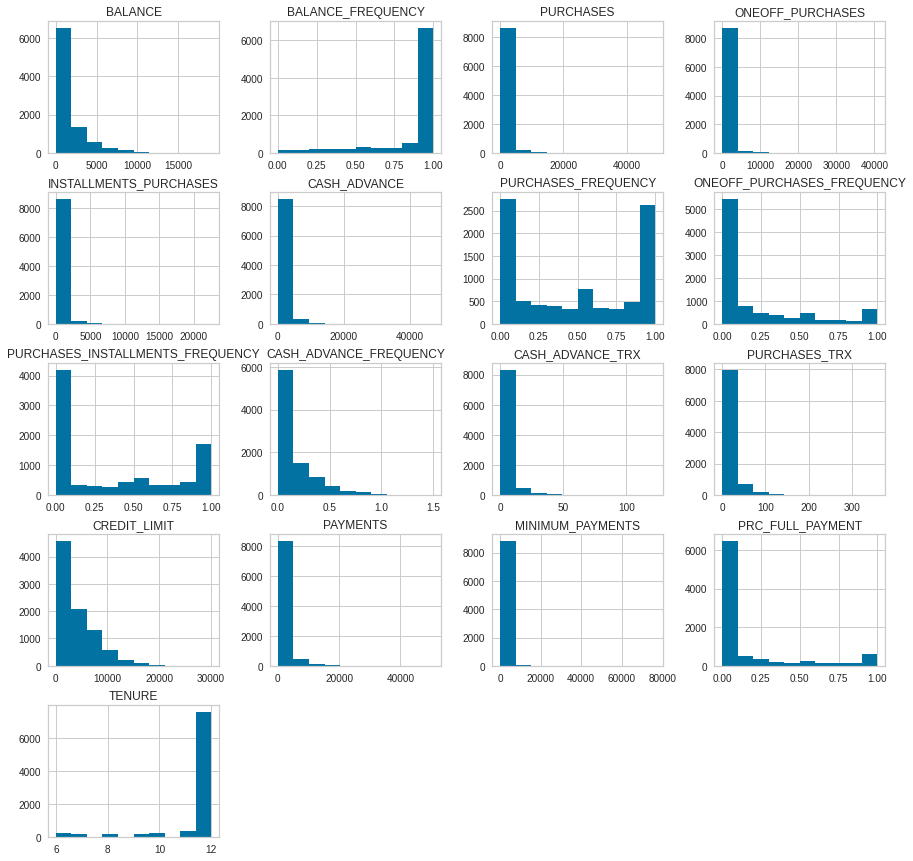

In [ ]:
# Plot histograms of all data features
df.hist(figsize=(15, 15))
plt.show()

observation: data features have large standard deviation. For most data features, the mean is often greater than the median suggesting that the distributions skew right. And the distribution is imbalanced acrossed features

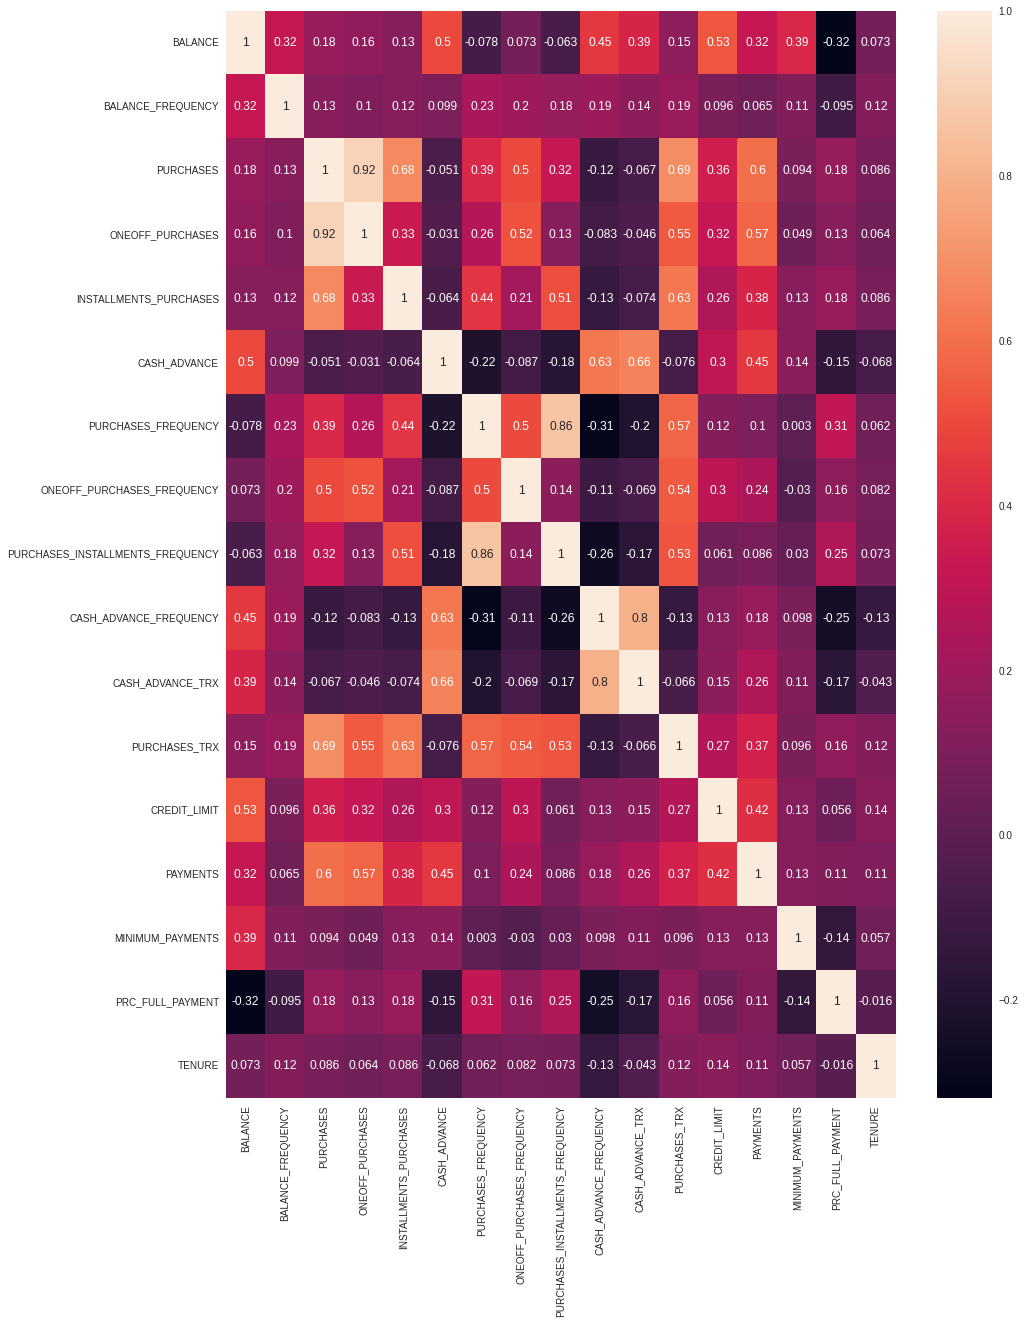

In [ ]:
# Polt the correlation heatmap between pairs of features.
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

#Data Preprocessing

In [ ]:
# Make a copy of the data
data = df.copy()

In [ ]:
#show data head
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Import StandardScaler to standardize the data features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit (calculate mean and standard deviation) and transform (substract mean and divide by std) the data
scaled_data = scaler.fit_transform(data.values)

## elbow method

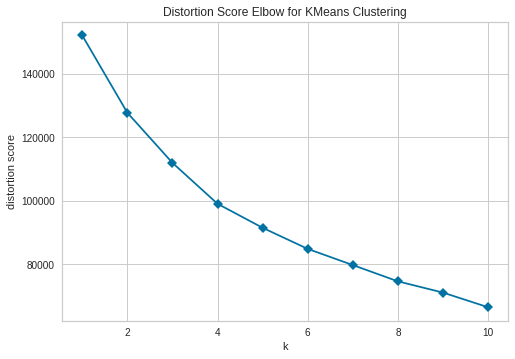

In [ ]:
# Install yellowbrick library
# !pip install yellowbrick

# Import KElbowVisualizer to use Elbow method
from yellowbrick.cluster import KElbowVisualizer

# Import KMeans library to use Kmeans algorithm
from sklearn.cluster import KMeans, MiniBatchKMeans

# Identify a good number of clusters between 1 and 11, do not show the fitting time and do not suggest elbow value.
# By default, the parameter locate_elbow is set to True, which automatically find the “elbow” which likely corresponds to the optimal value of k using the “knee point detection algorithm”. 
elbow_method = KElbowVisualizer(KMeans(), k=(1,11), timings=False, locate_elbow=False)
elbow_method.fit(scaled_data)
elbow_method.show()

it looks like 3 and 4 clusters are quite good. Let's try to see what the method suggest.

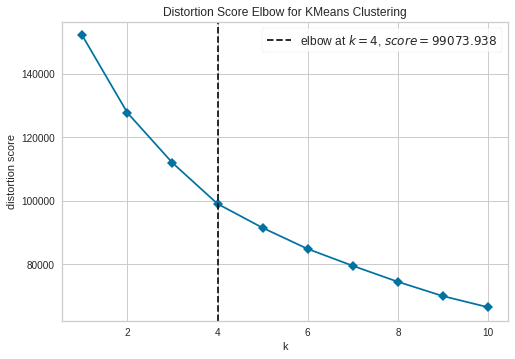

In [ ]:
elbow_method = KElbowVisualizer(KMeans(), k=(1,11), timings=False)
elbow_method.fit(scaled_data)
elbow_method.show()

##K-means model

In [ ]:
# Let us pick 4 clusters with random state = 42
kmeans_model = KMeans(n_clusters=4, random_state=42)

# Run K-means algorithm with K=4
kmeans_model.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Show cluster label of training data samples
kmeans_model.labels_

array([2, 1, 0, ..., 0, 2, 2], dtype=int32)

In [ ]:
# Make cluster label prediction of new data samples (assume here we use scaled_data as tes data samples).
kmeans_model.predict(scaled_data)

array([2, 1, 0, ..., 0, 2, 2], dtype=int32)

In [ ]:
# Show location of cluster centroids 
kmeans_model.cluster_centers_

array([[-3.21688457e-01,  2.42573999e-01,  1.09043960e-01,
         9.26320814e-04,  2.55903798e-01, -3.66372614e-01,
         9.83720816e-01,  3.17152671e-01,  8.74137767e-01,
        -4.62598760e-01, -3.60303396e-01,  2.96985169e-01,
        -7.72980064e-02, -1.38501975e-01, -9.18443871e-02,
         3.95041454e-01,  5.77439285e-02],
       [ 1.45957775e+00,  3.84753065e-01, -2.34638427e-01,
        -1.63914013e-01, -2.53746975e-01,  1.68897201e+00,
        -5.04847568e-01, -2.12939102e-01, -4.50201244e-01,
         1.74594805e+00,  1.61714316e+00, -2.83579688e-01,
         8.38967661e-01,  6.03820830e-01,  4.90909814e-01,
        -4.06367280e-01, -9.71460234e-02],
       [-2.65551629e-01, -3.68944296e-01, -3.43190301e-01,
        -2.30500433e-01, -3.87798111e-01, -1.82691101e-01,
        -7.97822605e-01, -3.89436941e-01, -7.14245761e-01,
        -1.01500402e-01, -1.64607283e-01, -4.74987456e-01,
        -3.34417115e-01, -2.62060256e-01, -1.19249231e-01,
        -2.58865702e-01, -5.2

#Dimensionality reduction with Principal Component Analysis (PCA)

In [ ]:
# Import PCA library
from sklearn.decomposition import PCA

# Find all principal components (i.e, eigen vectors of the covariance matrix, and eigen values) of the data, and equal to the number of data features.
pca = PCA(n_components=len(data.columns))
pca.fit(scaled_data)

PCA(n_components=17)

In [ ]:
# Print the amount of variance carried in each principal components (eigenvalues). This is the eigen values.
print("Amount of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_))

# Print the ratio of ammount of variance carried in each principal components (eigen values). The ratio is calculated by dividing the eigenvalue of each component by the sum of eigenvalues
print("\nRatio of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_ratio_))

# Sum of all ratios must be 1
print("\nCummulative sum of all ratios :\n" + str(pca.explained_variance_ratio_.cumsum()))

# Note: by ranking the eigenvectors in order of their eigenvalues, highest to lowest, we get the principal components in order of significance.

Amount of variance carried in each principal components (eigen values) :
[4.63982474e+00 3.45172419e+00 1.49480352e+00 1.27173785e+00
 1.06479362e+00 9.77645154e-01 8.30922729e-01 7.23853420e-01
 6.50969490e-01 5.23659568e-01 4.03267614e-01 3.01551195e-01
 2.42530713e-01 2.06975882e-01 1.72227523e-01 4.54007901e-02
 1.16501010e-05]

Ratio of variance carried in each principal components (eigen values) :
[2.72900372e-01 2.03019913e-01 8.79197945e-02 7.47997502e-02
 6.26279204e-02 5.75021129e-02 4.88723464e-02 4.25748554e-02
 3.82880445e-02 3.08000623e-02 2.37189739e-02 1.77363237e-02
 1.42649185e-02 1.21736915e-02 1.01298988e-02 2.67033632e-03
 6.85223491e-07]

Cummulative sum of all ratios :
[0.27290037 0.47592029 0.56384008 0.63863983 0.70126775 0.75876986
 0.80764221 0.85021707 0.88850511 0.91930517 0.94302415 0.96076047
 0.97502539 0.98719908 0.99732898 0.99999931 1.        ]


## 3-dimensional PCA

In [ ]:
# We test the three most important principal components as they cover 56.4% (0.5638) of the data variance.
pca3 = PCA(n_components=3)

# Fit (i.e., construct the 3-dimensional PCA space) and transform (i.e., project the original data points into the 3-dimensional PCA space).
pca3_data = pca3.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 3-dimensional PCA space, namely "pca_1", "pca_2" and "pca_3"
pca3_df = pd.DataFrame(pca3_data, columns=["pca_1", "pca_2", "pca_3"])

In [ ]:
# Show the data frame
pca3_df.head()

,pca_1,pca_2,pca_3
0,-1.682219,-1.076448,0.488597
1,-1.138294,2.506481,0.601312
2,0.969684,-0.383522,0.102325
3,-0.873626,0.043170,1.460306
4,-1.599433,-0.688579,0.365157


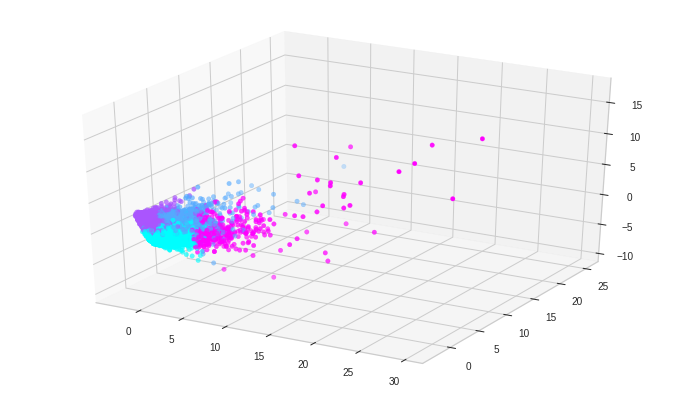

In [ ]:
# Plot the data points in the 3-dimensional space with feature pca_1, pca_2 and pca_3, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca3_df.pca_1, pca3_df.pca_2, pca3_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

##2-dimensional PCA

In [ ]:
# We test the two most important principal components as they cover 47.6% (0.4759) of the data variance.
pca2 = PCA(n_components=2)

# Fit (i.e., construct the 2-dimensional PCA space) and transform (i.e., project the original data points into the 2-dimensional PCA space).
pca2_data = pca2.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 2-dimensional PCA space, namely "pca_1" and "pca_2"
pca2_df = pd.DataFrame(pca2_data, columns=["pca_1", "pca_2"])

In [ ]:
pca2_df.head()

,pca_1,pca_2
0,-1.682219,-1.076446
1,-1.138293,2.506480
2,0.969686,-0.383479
3,-0.873624,0.043195
4,-1.599434,-0.688587


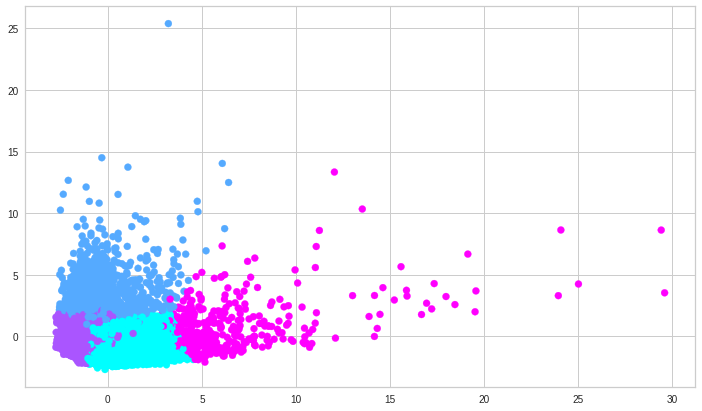

In [ ]:
# Plot the data points in the 2-dimensional space with feature pca_1 and pca_2, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca2_df.pca_1, pca2_df.pca_2, c=kmeans_model.labels_, cmap="cool")
plt.show()

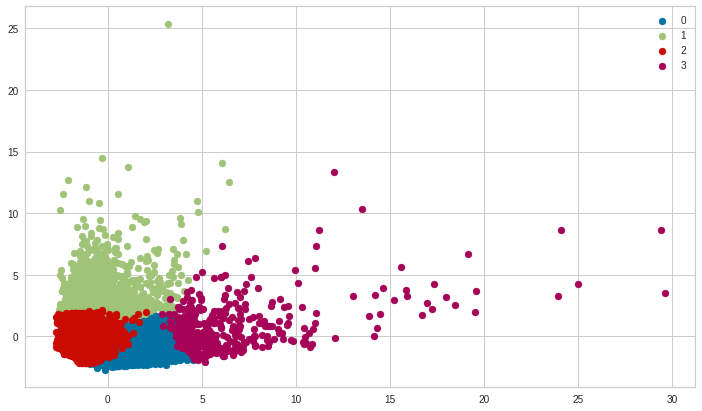

In [ ]:
# Visualize the cluster with legend
plt.figure(figsize=(12, 7))
ax = plt.subplot()

# List of labels
group = kmeans_model.labels_

# Plot data samples in each label group: 0, 1 and 2.
for g in np.unique(group):
    index = np.where(group==g)     # Get all indices of label group g
    ax.scatter(pca2_df.iloc[index].pca_1, pca2_df.iloc[index].pca_2, label=g, cmap="cool")     # Plot data points with label
ax.legend()
plt.show()

#TSNE visualization

In [ ]:
#Import TSNE library
from sklearn.manifold import TSNE

# We test the three most important principal components as they cover 56.4% (0.5638) of the data variance.
tsne3 = TSNE(n_components=3, perplexity=5, learning_rate='auto')

# Fit (i.e., construct the 3-dimensional TSNE space) and transform (i.e., project the original data points into the 3-dimensional TSNE space).
tsne3_data = tsne3.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 3-dimensional TSNE space, namely "tsne_1", "tsne_2" and "tsne_3"
tsne3_df = pd.DataFrame(tsne3_data, columns=["tsne_1", "tsne_2", "tsne_3"])

In [ ]:
tsne3_df.head()

,tsne_1,tsne_2,tsne_3
0,-17.020178,23.255167,2.363070
1,0.210494,10.242281,-16.101683
2,4.238228,-29.841467,-3.524707
3,-6.389973,19.846052,-0.747465
4,-31.347858,-4.816864,-19.263548


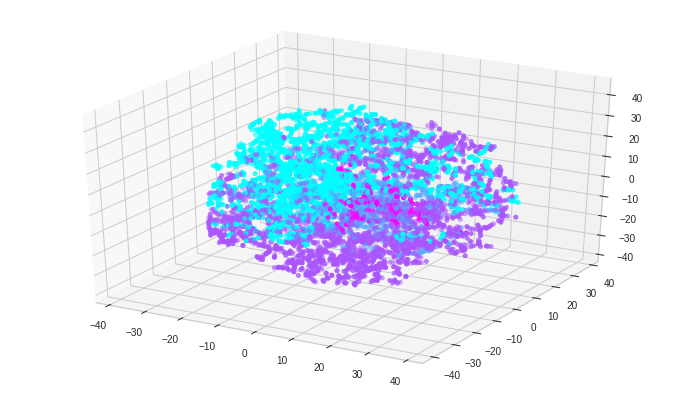

In [ ]:
# Plot the data points in the 3-dimensional space with feature tsne_1, tsne_2 and tsne_3, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(tsne3_df.tsne_1, tsne3_df.tsne_2, tsne3_df.tsne_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

In [ ]:
# We test the two most important principal components as they cover 47.6% (0.4759) of the data variance.
tsne2 = TSNE(n_components=2, perplexity=5, learning_rate='auto')

# Fit (i.e., construct the 2-dimensional TSNE space) and transform (i.e., project the original data points into the 2-dimensional TSNE space).
tsne2_data = tsne2.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 2-dimensional PCA space, namely "pca_1" and "pca_2"
tsne2_df = pd.DataFrame(tsne2_data, columns=["tsne_1", "tsne_2"])

In [ ]:
tsne2_df.head()

,tsne_1,tsne_2
0,-57.724701,13.706342
1,17.263044,-60.018196
2,34.576603,7.791953
3,-45.057957,12.971011
4,-86.435097,0.697108


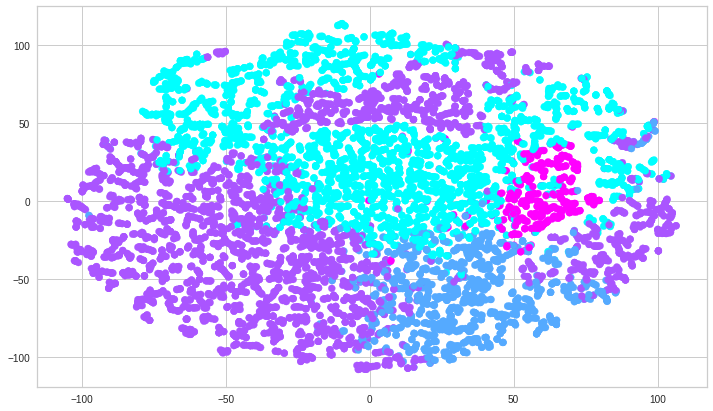

In [ ]:
# Plot the data points in the 2-dimensional space with feature tsne_1 and tsne_2, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(tsne2_df.tsne_1, tsne2_df.tsne_2, c=kmeans_model.labels_, cmap="cool")
plt.show()

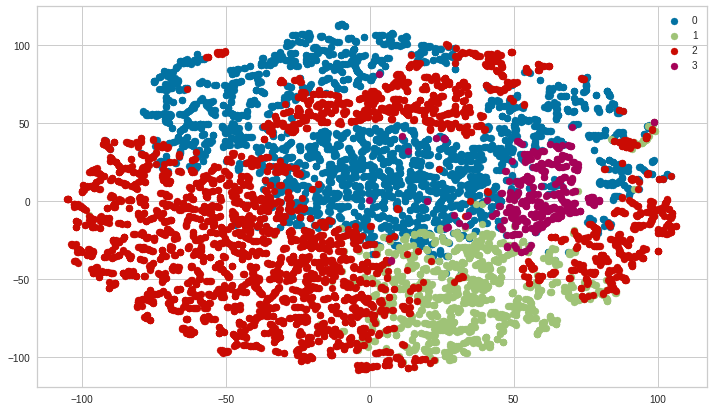

In [ ]:
# Visualize the cluster with legend
plt.figure(figsize=(12, 7))
ax = plt.subplot()

# List of labels
group = kmeans_model.labels_

# Plot data samples in each label group: 0, 1 and 2.
for g in np.unique(group):
    index = np.where(group==g)     # Get all indices of label group g
    ax.scatter(tsne2_df.iloc[index].tsne_1, tsne2_df.iloc[index].tsne_2, label=g, cmap="cool")     # Plot data points with label
ax.legend()
plt.show()

#Cluster Characteristics

## Save and Load model

In [ ]:
# Save model using pickle library
import pickle
file_name = "model.sav"                              # Path to save the model
pickle.dump(kmeans_model, open(file_name, "wb"))     # Save the model to a pickle file

In [ ]:
# Load the saved model using pickle library
file_name = "model.sav"
load_model = pickle.load(open(file_name, "rb"))

In [ ]:
# Access cluster information from the loaded model
cluster = load_model.labels_
cluster_0 = np.where(cluster==0)   # indices of data samples in cluster 0
cluster_1 = np.where(cluster==1)   # indices of data samples in cluster 1
cluster_2 = np.where(cluster==2)   # indices of data samples in cluster 2
cluster_3 = np.where(cluster==3)   # indices of data samples in cluster 3

In [ ]:
# Get data samples in each cluster
cluster0 = data.iloc[cluster_0]
cluster1 = data.iloc[cluster_1]
cluster2 = data.iloc[cluster_2]
cluster3 = data.iloc[cluster_3]

##Clusters analysis

In [ ]:
#show the head of cluster label 0
cluster0.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,2495.148862,1.0,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12
5,1809.828751,1.0,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12
7,1823.652743,1.0,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12
10,1293.124939,1.0,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12
12,1516.928620,1.0,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12


In [ ]:
cluster0.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000
mean,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
std,1212.134419,0.161833,1041.149669,872.592208,623.932335,602.337305,0.150874,0.353245,0.313701,0.099497,2.029238,15.954692,3261.269960,1275.813034,1776.698287,0.357381,1.248127
min,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.019163,0.000000,6.000000
25%,80.529535,1.000000,439.960000,0.000000,223.255000,0.000000,0.800000,0.000000,0.545455,0.000000,0.000000,12.000000,1500.000000,456.587019,161.279143,0.000000,12.000000
50%,337.269567,1.000000,892.300000,168.540000,450.670000,0.000000,1.000000,0.111111,0.833333,0.000000,0.000000,16.000000,3000.000000,938.788924,196.720403,0.083333,12.000000
75%,1256.639648,1.000000,1772.165000,903.000000,874.375000,0.000000,1.000000,0.583333,1.000000,0.000000,0.000000,28.000000,6000.000000,1778.813262,606.819688,0.500000,12.000000
max,9502.256762,1.000000,6520.000000,6520.000000,4538.840000,7894.578816,1.000000,1.000000,1.000000,0.750000,23.000000,186.000000,25000.000000,12020.180090,38512.124770,1.000000,12.000000


In [ ]:
cluster1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
std,2754.575494,0.091212,862.938799,666.283102,416.133434,3622.443388,0.354104,0.228871,0.311182,0.228421,12.299926,14.043625,3744.186712,4210.279433,3888.093906,0.103212,1.471048
min,78.114579,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000
25%,2480.135387,1.000000,0.000000,0.000000,0.000000,2321.162031,0.000000,0.000000,0.000000,0.333333,7.000000,0.000000,5000.000000,1214.469989,752.614680,0.000000,12.000000
50%,4275.708869,1.000000,85.730000,0.000000,0.000000,3653.331329,0.083333,0.000000,0.000000,0.500000,11.500000,1.000000,7000.000000,1963.135909,1309.935203,0.000000,12.000000
75%,6239.276755,1.000000,654.852500,330.352500,144.625000,5592.000447,0.571429,0.166667,0.333333,0.666667,17.000000,10.000000,10000.000000,4021.265959,2043.939591,0.000000,12.000000
max,16304.889250,1.000000,7194.530000,6678.260000,4059.930000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,142.000000,21500.000000,39048.597620,61031.618600,1.000000,12.000000


In [ ]:
cluster2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000
mean,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
std,1097.368627,0.295184,467.629965,448.020861,155.198248,918.845971,0.188211,0.135703,0.148779,0.136996,2.963950,3.935739,2654.908975,1578.553518,1314.377150,0.205789,1.416399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,82.249034,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,268.254041,160.857255,0.000000,12.000000
50%,763.684601,1.000000,79.100000,0.000000,0.000000,116.886449,0.083333,0.000000,0.000000,0.083333,1.000000,1.000000,2500.000000,534.729290,310.336181,0.000000,12.000000
75%,1505.001170,1.000000,339.767500,211.877500,51.207500,934.970675,0.333333,0.100000,0.083333,0.166667,3.000000,5.000000,4000.000000,1072.484778,657.149667,0.000000,12.000000
max,8115.039014,1.000000,4900.000000,4900.000000,3000.000000,6523.780195,1.000000,1.000000,0.857143,0.857143,23.000000,43.000000,23000.000000,29272.486070,28483.254830,1.000000,12.000000


In [ ]:
cluster3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
std,3344.579386,0.059070,5978.185287,5377.597586,2727.924691,1872.977038,0.134578,0.289475,0.313123,0.153532,6.084375,56.419780,4824.345602,6875.811470,5069.201346,0.392138,0.451093
min,137.636267,0.272727,900.870000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,1000.000000,0.000000,108.937025,0.000000,6.000000
25%,881.358988,1.000000,4569.650000,2265.110000,835.800000,0.000000,1.000000,0.583333,0.666667,0.000000,0.000000,52.000000,6000.000000,3597.677582,249.009390,0.000000,12.000000
50%,2492.726282,1.000000,5848.550000,3705.130000,1827.960000,0.000000,1.000000,0.833333,1.000000,0.000000,0.000000,79.000000,9000.000000,5446.940305,726.696049,0.000000,12.000000
75%,5193.415429,1.000000,8533.540000,6206.990000,3176.000000,283.476295,1.000000,1.000000,1.000000,0.083333,1.000000,110.000000,12000.000000,8337.882098,1912.298544,0.666667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,62.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


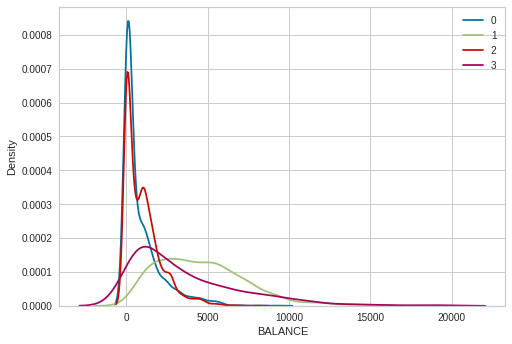

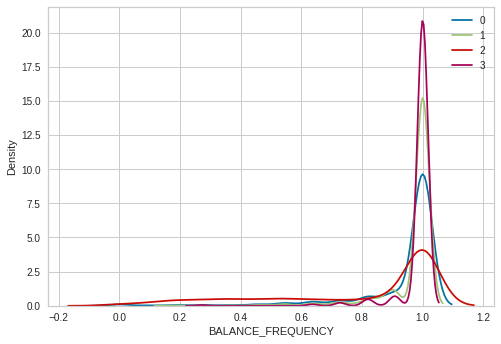

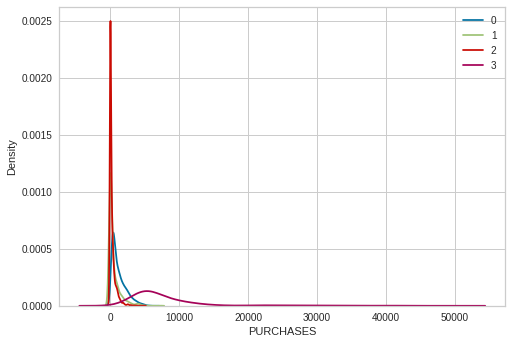

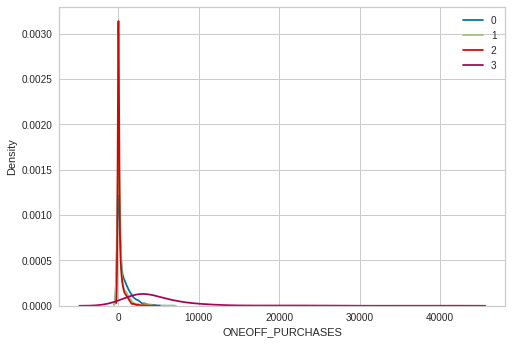

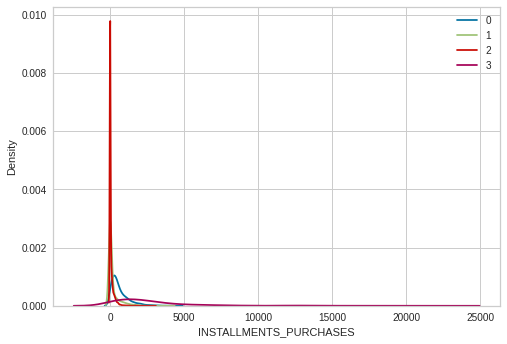

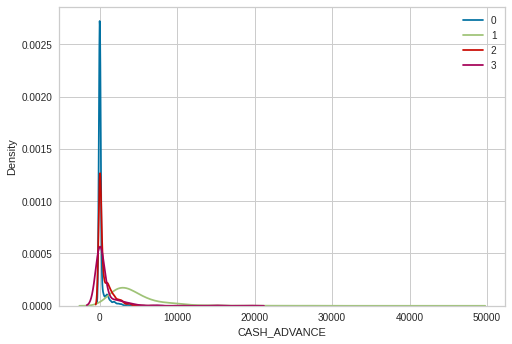

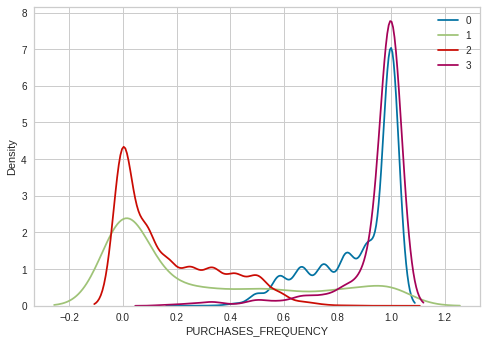

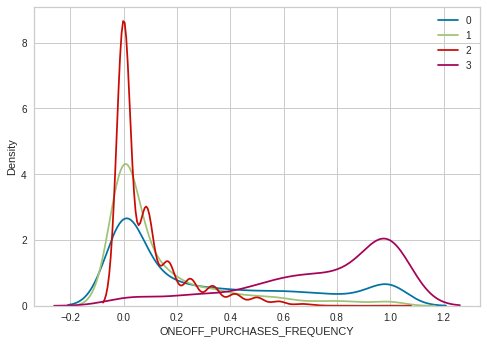

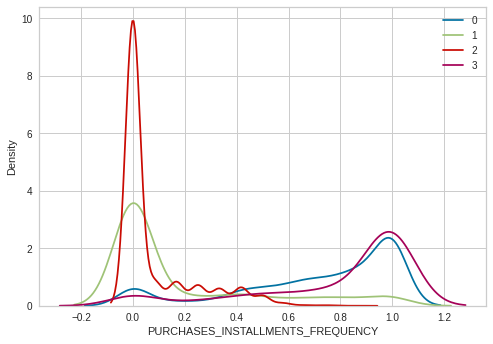

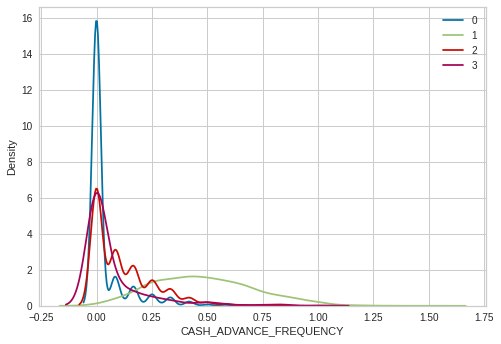

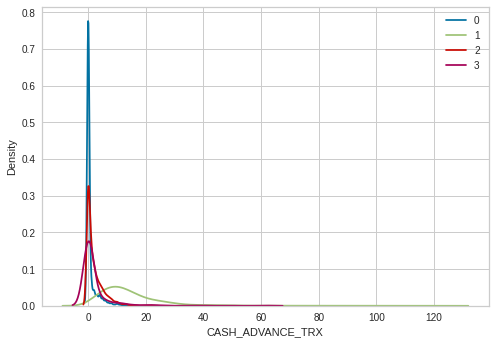

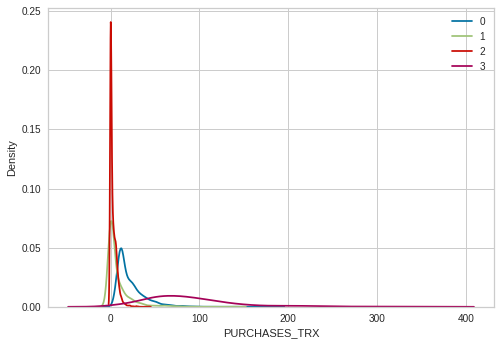

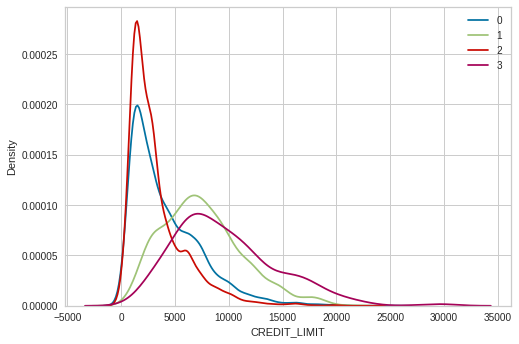

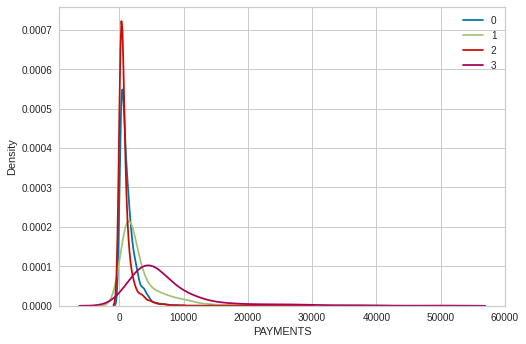

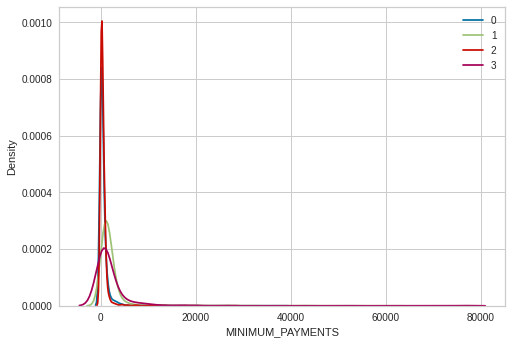

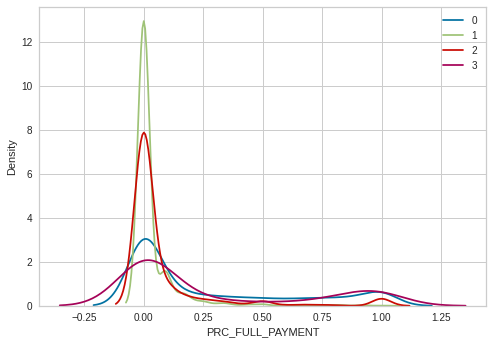

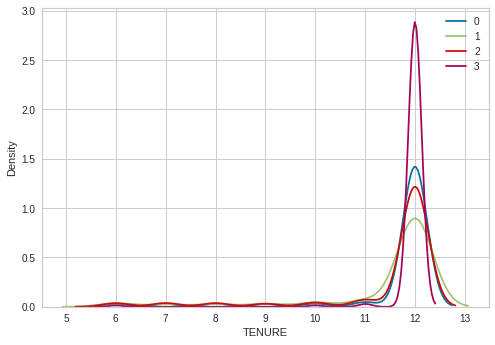

In [ ]:
for col in cluster0.columns:
  plt.figure()
  for i in [cluster0, cluster1, cluster2, cluster3]:
    sns.distplot(i[[col]], hist=False, rug=False)
  plt.legend(['0', '1', '2', '3'])
  plt.xlabel(col)    
plt.show()

Analysis of the clusters:


*   Cluster 0 has the second highest number of data samples. This cluster has low balance amount with a high amount of purchases compared to the other clusters. It also has high purchase frequency and most of the time no cash in advance. The average credit limit of this cluster is above $4000. I think that this cluster has the characteristics of credit card users who like to make use of their credit cards limits. They rarely used their credit card for cash but often used it for making purchases.

* cluster 1 has the second lowest number of data samples. This cluster has high balance amount with a low amount of purchases. It has low purchase frequency but very high cash in advance. The average credit limit of this cluster is around $7000. These people are credit cards holder with a higher purchasing power than cluster 0 and 2 but they often do not use it to make purchase but rather taking money from the ATM.

* Cluster 2 has the highest number of data samples. This cluster has low balance amount with a low amount of purchases. It has low purchase frequency and just a little cash in advance. The average credit limit of this cluster is around $3000. I think that the people in this cluster rarely used their credit cards 


* cluster 3 has the lowest number of data samples. This cluster has high balance amount with a very high amount of purchases. It has high purchase frequency and with low to no cash in advance. The average credit limit of this cluster is the highest at around $9000. These people are those with the highest credit and purchasing power and they often max out their credit cards. 

